In [1]:
import sys
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
print(f'Python  version: {sys.version}')
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')

Python  version: 3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
pandas  version: 1.4.4
numpy   version: 1.22.4


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/dataAir_phrakanong.csv',usecols=[0,1,2,3,4,5,6,7,8,9,10,11],parse_dates=['date'], skipinitialspace=True)
data

,date,pm10,co,no,no2,nox,pm25,avgT,humid,pressure-monthly,windDir,windSpd
0,2018-01-01,65.291667,1.33,74.2,45.4,119.5,NaN,27.1,70,1009.40,100.0,9.0
1,2018-01-02,77.041667,1.35,73.0,51.3,124.2,NaN,27.5,67,1009.40,120.0,4.0
2,2018-01-03,96.708333,1.73,98.5,58.0,156.5,NaN,28.2,66,1009.40,60.0,4.0
3,2018-01-04,115.125000,1.76,92.4,62.7,155.2,NaN,29.3,64,1009.40,330.0,6.0
4,2018-01-05,116.625000,1.35,51.1,60.9,111.9,NaN,30.4,63,1009.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1760,2022-10-27,84.000000,1.50,117.6,35.2,152.9,19.0,28.5,79,1009.24,120.0,9.0
1761,2022-10-28,92.000000,1.60,127.1,38.1,165.2,21.0,29.6,72,1009.24,170.0,7.0
1762,2022-10-29,90.000000,1.30,92.0,43.1,135.1,23.0,29.5,62,1009.24,120.0,13.0
1763,2022-10-30,95.000000,1.30,76.9,51.5,128.4,32.0,30.0,62,1009.24,120.0,13.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1765 non-null   datetime64[ns]
 1   pm10              1721 non-null   float64       
 2   co                1737 non-null   float64       
 3   no                1739 non-null   float64       
 4   no2               1739 non-null   float64       
 5   nox               1738 non-null   float64       
 6   pm25              1016 non-null   float64       
 7   avgT              1695 non-null   float64       
 8   humid             1765 non-null   int64         
 9   pressure-monthly  1765 non-null   float64       
 10  windDir           1735 non-null   float64       
 11  windSpd           1737 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 165.6 KB


In [7]:
data=data.sort_values('date').reset_index(drop=True).copy()
data

,date,pm10,co,no,no2,nox,pm25,avgT,humid,pressure-monthly,windDir,windSpd
0,2018-01-01,65.291667,1.33,74.2,45.4,119.5,NaN,27.1,70,1009.40,100.0,9.0
1,2018-01-02,77.041667,1.35,73.0,51.3,124.2,NaN,27.5,67,1009.40,120.0,4.0
2,2018-01-03,96.708333,1.73,98.5,58.0,156.5,NaN,28.2,66,1009.40,60.0,4.0
3,2018-01-04,115.125000,1.76,92.4,62.7,155.2,NaN,29.3,64,1009.40,330.0,6.0
4,2018-01-05,116.625000,1.35,51.1,60.9,111.9,NaN,30.4,63,1009.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1760,2022-10-27,84.000000,1.50,117.6,35.2,152.9,19.0,28.5,79,1009.24,120.0,9.0
1761,2022-10-28,92.000000,1.60,127.1,38.1,165.2,21.0,29.6,72,1009.24,170.0,7.0
1762,2022-10-29,90.000000,1.30,92.0,43.1,135.1,23.0,29.5,62,1009.24,120.0,13.0
1763,2022-10-30,95.000000,1.30,76.9,51.5,128.4,32.0,30.0,62,1009.24,120.0,13.0


In [8]:
y_col='pm25'

In [9]:
data.dropna(subset=[y_col], inplace=True)
data=data.reset_index(drop=True)
data

,date,pm10,co,no,no2,nox,pm25,avgT,humid,pressure-monthly,windDir,windSpd
0,2020-01-13,70.0,1.04,49.7,24.4,74.1,42.0,30.1,77,1011.12,130.0,6.0
1,2020-01-20,116.0,1.36,68.2,34.7,102.9,68.0,30.6,76,1011.12,150.0,5.0
2,2020-01-21,95.0,1.06,47.3,22.9,70.2,49.0,30.3,77,1011.12,160.0,6.0
3,2020-01-22,74.0,0.74,16.6,26.3,42.8,36.0,31.6,77,1011.12,150.0,6.0
4,2020-01-23,57.0,0.55,6.5,14.1,20.6,29.0,30.8,75,1011.12,160.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1011,2022-10-27,84.0,1.50,117.6,35.2,152.9,19.0,28.5,79,1009.24,120.0,9.0
1012,2022-10-28,92.0,1.60,127.1,38.1,165.2,21.0,29.6,72,1009.24,170.0,7.0
1013,2022-10-29,90.0,1.30,92.0,43.1,135.1,23.0,29.5,62,1009.24,120.0,13.0
1014,2022-10-30,95.0,1.30,76.9,51.5,128.4,32.0,30.0,62,1009.24,120.0,13.0


In [10]:
def date_parts(data, date_colname='date'):
    '''create year, month, day, dayname columns'''
    data['year']=data['date'].dt.year
    data['month']=data['date'].dt.month
    data['day']=data['date'].dt.day
    data['day_name']=data['date'].dt.day_name().astype('category')

In [11]:
date_parts(data)

In [12]:
data

,date,pm10,co,no,no2,nox,pm25,avgT,humid,pressure-monthly,windDir,windSpd,year,month,day,day_name
0,2020-01-13,70.0,1.04,49.7,24.4,74.1,42.0,30.1,77,1011.12,130.0,6.0,2020,1,13,Monday
1,2020-01-20,116.0,1.36,68.2,34.7,102.9,68.0,30.6,76,1011.12,150.0,5.0,2020,1,20,Monday
2,2020-01-21,95.0,1.06,47.3,22.9,70.2,49.0,30.3,77,1011.12,160.0,6.0,2020,1,21,Tuesday
3,2020-01-22,74.0,0.74,16.6,26.3,42.8,36.0,31.6,77,1011.12,150.0,6.0,2020,1,22,Wednesday
4,2020-01-23,57.0,0.55,6.5,14.1,20.6,29.0,30.8,75,1011.12,160.0,7.0,2020,1,23,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,2022-10-27,84.0,1.50,117.6,35.2,152.9,19.0,28.5,79,1009.24,120.0,9.0,2022,10,27,Thursday
1012,2022-10-28,92.0,1.60,127.1,38.1,165.2,21.0,29.6,72,1009.24,170.0,7.0,2022,10,28,Friday
1013,2022-10-29,90.0,1.30,92.0,43.1,135.1,23.0,29.5,62,1009.24,120.0,13.0,2022,10,29,Saturday
1014,2022-10-30,95.0,1.30,76.9,51.5,128.4,32.0,30.0,62,1009.24,120.0,13.0,2022,10,30,Sunday


In [13]:
data.columns

Index(['date', 'pm10', 'co', 'no', 'no2', 'nox', 'pm25', 'avgT', 'humid',
       'pressure-monthly', 'windDir', 'windSpd', 'year', 'month', 'day',
       'day_name'],
      dtype='object')

In [14]:
df=data[['date', 'year', 'month', 'day', 'day_name', y_col]]
df

,date,year,month,day,day_name,pm25
0,2020-01-13,2020,1,13,Monday,42.0
1,2020-01-20,2020,1,20,Monday,68.0
2,2020-01-21,2020,1,21,Tuesday,49.0
3,2020-01-22,2020,1,22,Wednesday,36.0
4,2020-01-23,2020,1,23,Thursday,29.0
...,...,...,...,...,...,...
1011,2022-10-27,2022,10,27,Thursday,19.0
1012,2022-10-28,2022,10,28,Friday,21.0
1013,2022-10-29,2022,10,29,Saturday,23.0
1014,2022-10-30,2022,10,30,Sunday,32.0


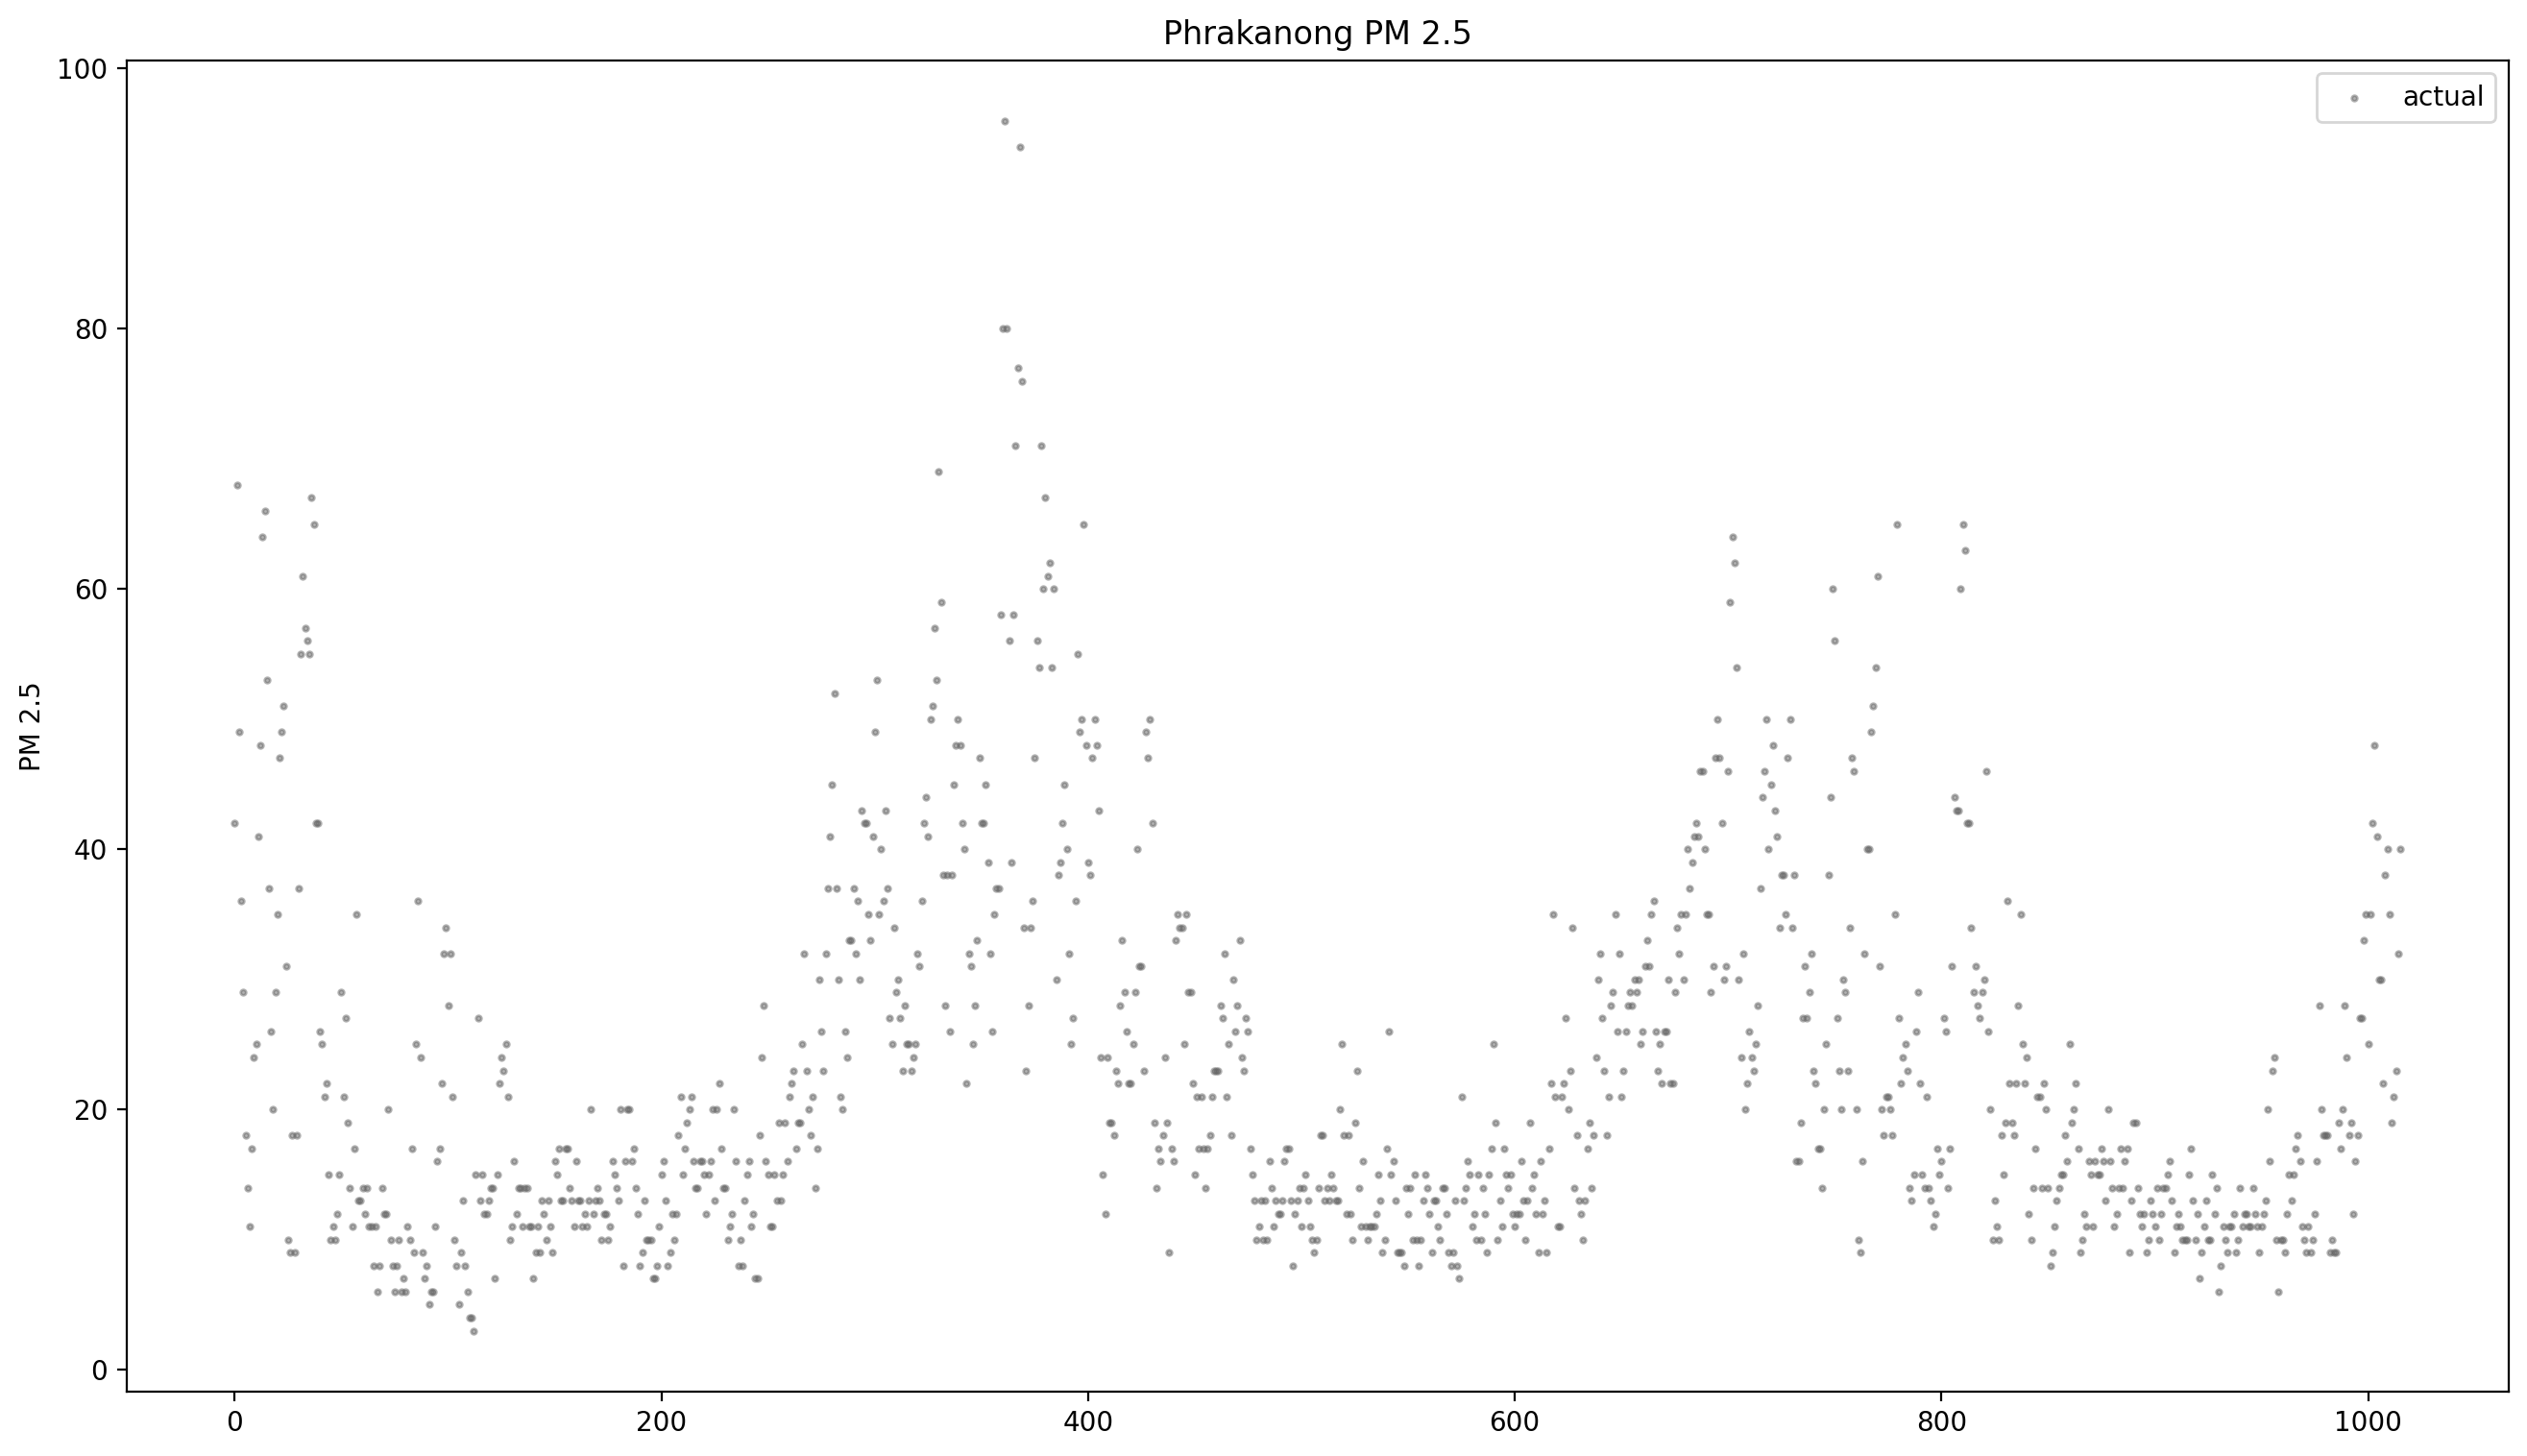

In [15]:
plt.figure(figsize=(16, 9))
plt.scatter(df.index, df[y_col], alpha=.5, s=4, label='actual', color='.4')
plt.ylabel('PM 2.5')
plt.title('Phrakanong PM 2.5')
plt.legend();

In [16]:
feature_cols=[
    'year', 'month', 
    'day', 
    'day_name'
]
X=df[feature_cols]
y=df[y_col]

In [17]:
df=data.copy()
df['y']=df['pm25'].shift(-1)


In [18]:
train=df[:-508]
test=df[-508:]
test=test.drop(test.tail(1).index)

In [19]:
X_train = train['y'].values.reshape(-1,1)
y_test = test['pm25'].values.reshape(-1,1)
y_train = train['y'].values.reshape(-1,1)
X_test =test['pm25'].values.reshape(-1,1)

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=42)
reg.fit(X=X_train, y=y_train.ravel())
reg_pred = reg.predict(X_test)
test['gbr_pred'] = reg_pred
test

,date,pm10,co,no,no2,nox,pm25,avgT,humid,pressure-monthly,windDir,windSpd,year,month,day,day_name,y,gbr_pred
508,2021-06-11,26.0,0.4,19.3,13.3,32.6,14.0,29.9,74,1006.74,350.0,10.0,2021,6,11,Friday,18.0,14.000429
509,2021-06-12,33.0,0.4,16.7,13.7,30.4,18.0,31.5,71,1006.74,290.0,9.0,2021,6,12,Saturday,18.0,17.971629
510,2021-06-13,37.0,0.6,34.4,11.0,45.4,18.0,30.2,81,1006.74,210.0,9.0,2021,6,13,Sunday,13.0,17.971629
511,2021-06-14,25.0,0.4,14.7,10.7,25.4,13.0,29.8,77,1006.74,240.0,8.0,2021,6,14,Monday,14.0,13.000309
512,2021-06-15,22.0,0.4,10.1,10.8,20.9,14.0,29.6,74,1006.74,280.0,8.0,2021,6,15,Tuesday,13.0,14.000429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,2022-10-26,107.0,1.7,115.4,56.3,171.7,35.0,30.3,69,1009.24,110.0,7.0,2022,10,26,Wednesday,19.0,34.999488
1011,2022-10-27,84.0,1.5,117.6,35.2,152.9,19.0,28.5,79,1009.24,120.0,9.0,2022,10,27,Thursday,21.0,19.031324
1012,2022-10-28,92.0,1.6,127.1,38.1,165.2,21.0,29.6,72,1009.24,170.0,7.0,2022,10,28,Friday,23.0,21.006783
1013,2022-10-29,90.0,1.3,92.0,43.1,135.1,23.0,29.5,62,1009.24,120.0,13.0,2022,10,29,Saturday,32.0,22.999959


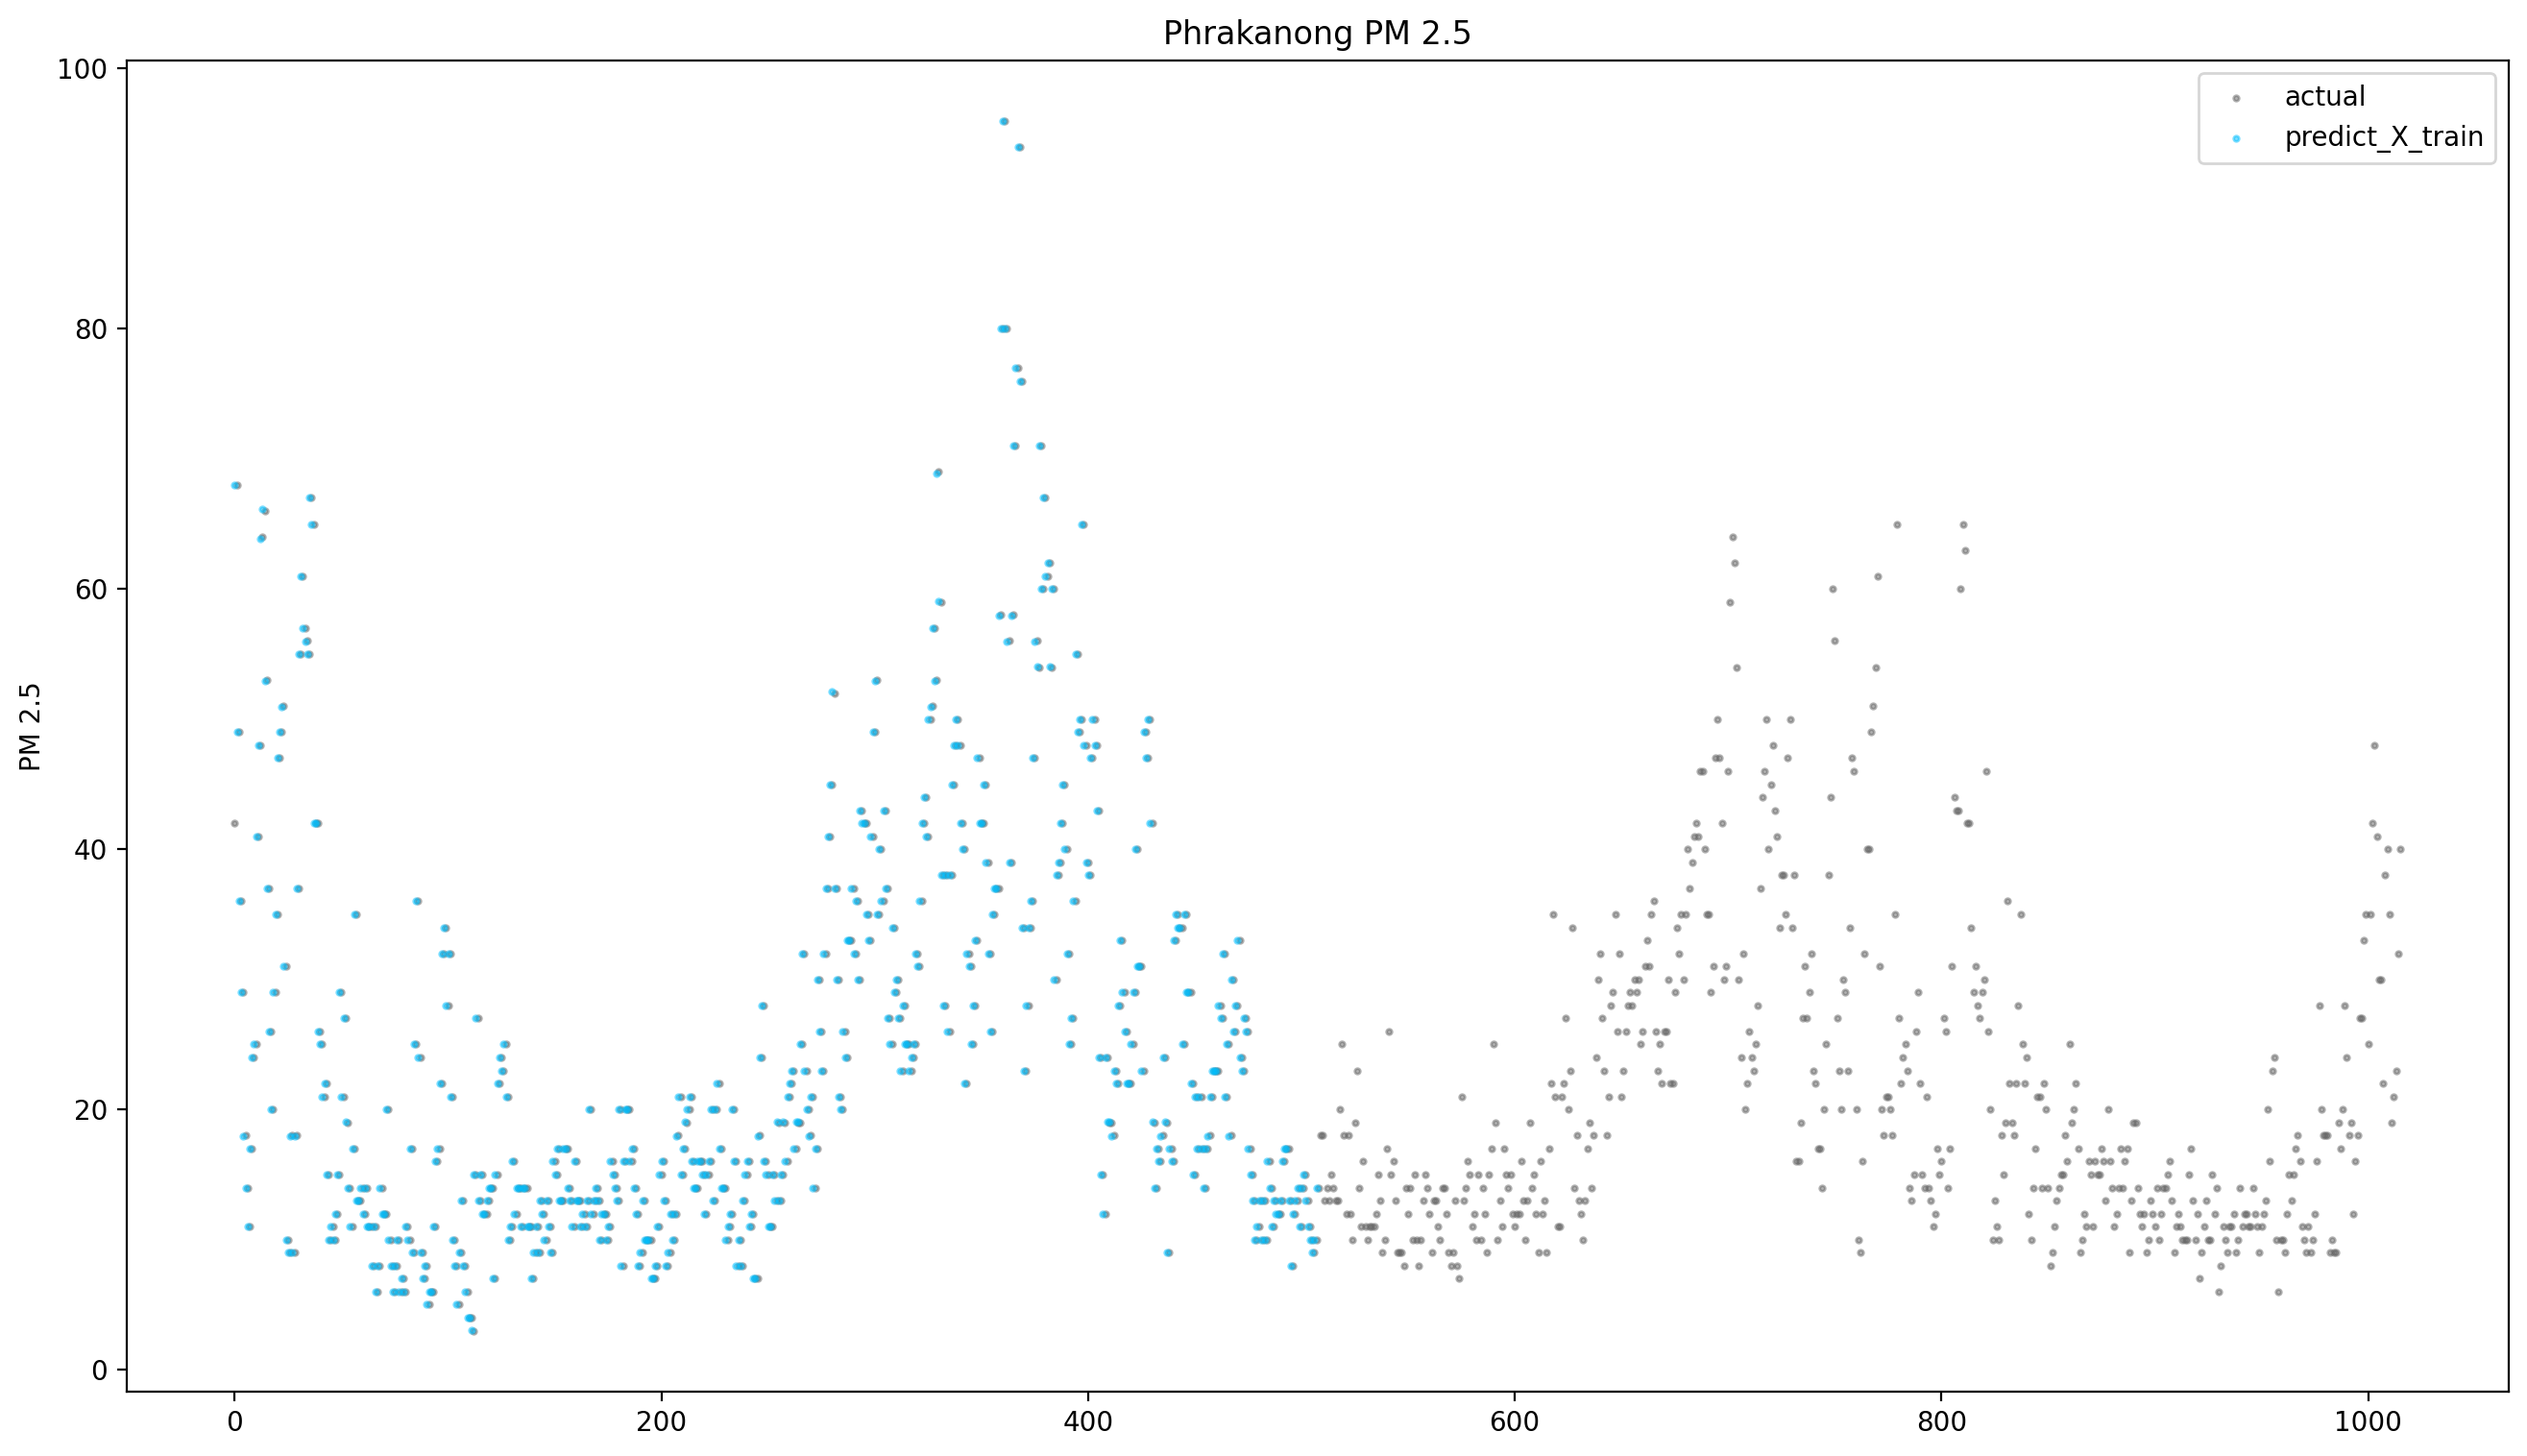

In [22]:
plt.figure(figsize=(16, 9))
plt.scatter(df.index, df[y_col], alpha=.5, s=4, label='actual', color='.4')
plt.scatter(train.index, reg.predict(X_train), alpha=.5, s=4, label='predict_X_train', color='deepskyblue')
#plt.scatter(test.index, reg.predict(X_test), alpha=.5, s=4, label='predict_X_test', color='orange')
plt.ylabel('PM 2.5')
plt.title('Phrakanong PM 2.5')
plt.legend();

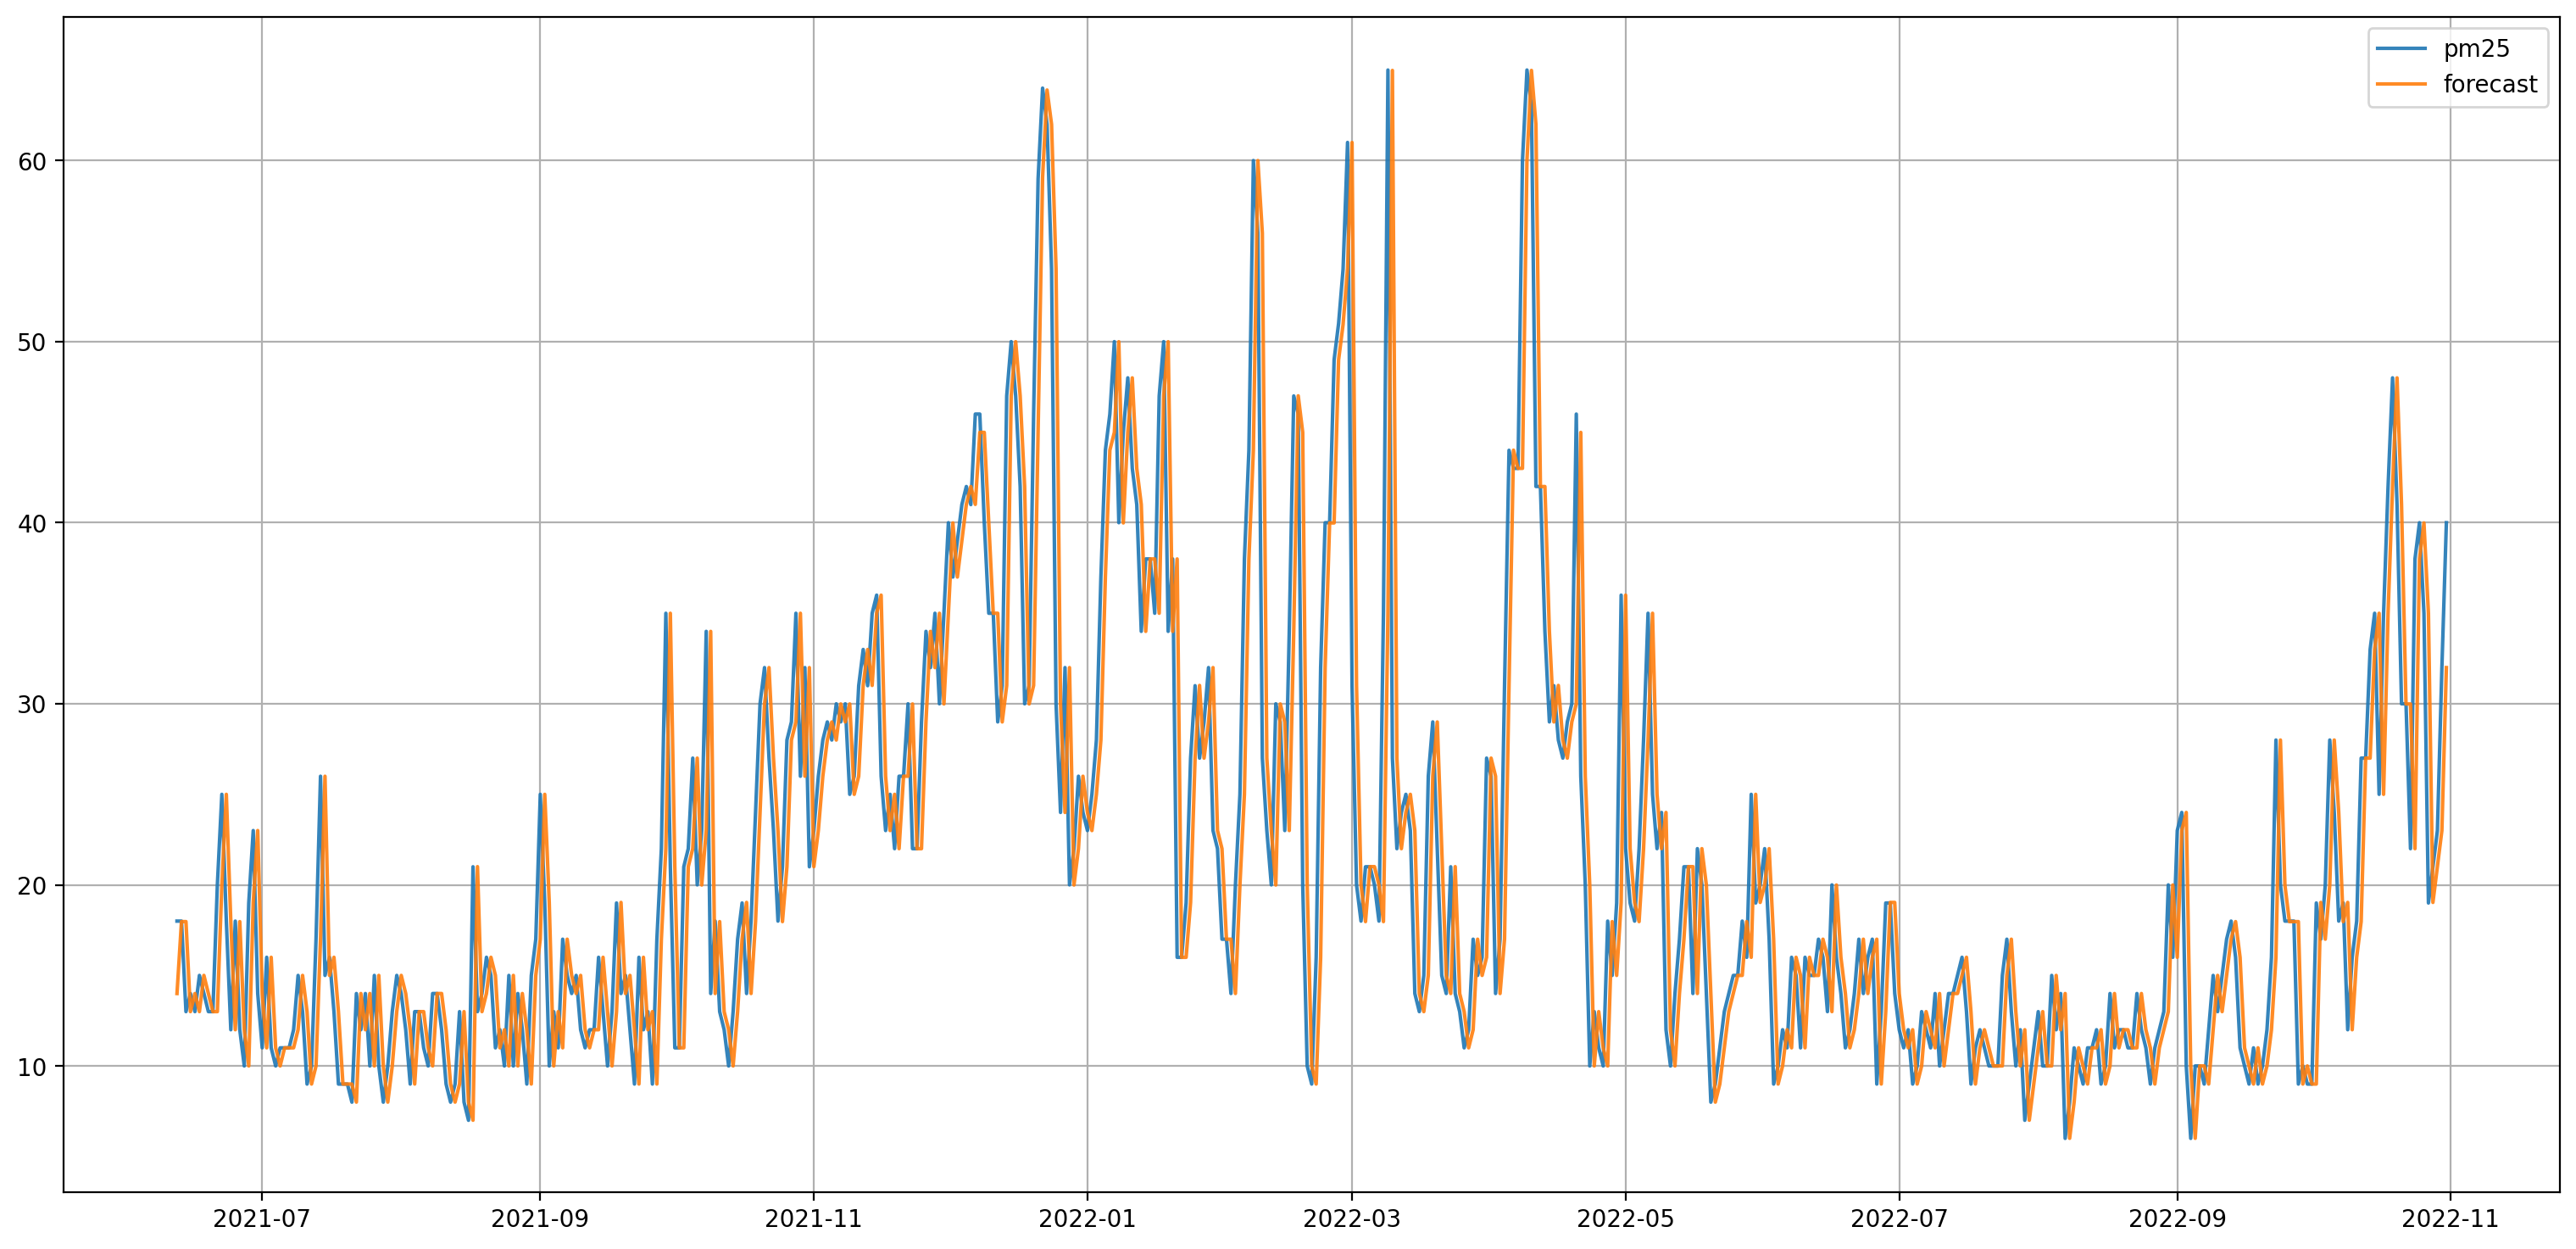

In [23]:
# test พยากรณ์กราฟ
yhat = reg.predict(X_test)

# Constructing the forecast dataframe
fc = df.tail(len(yhat)).copy() #ข้อมูลส่วนท้ายเป็น test
fc.reset_index(inplace=True)
fc['forecast'] = yhat
# Ploting the forecasts
plt.figure(figsize=(19, 9))
for dtype in ['pm25', 'forecast']: #'forecast'

    plt.plot(
        'date',
        dtype,
        data=fc,
        label=dtype,
        alpha=0.9
    )
plt.legend()
plt.grid()
plt.show()

In [24]:
reg.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [25]:
params={'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
}
# reg = lgb.LGBMRegressor()
# reg = lgb.LGBMRegressor(**params)

In [26]:
reg.__dict__

{'n_estimators': 100,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'criterion': 'friedman_mse',
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'subsample': 1.0,
 'max_features': None,
 'max_depth': 3,
 'min_impurity_decrease': 0.0,
 'ccp_alpha': 0.0,
 'init': None,
 'random_state': 42,
 'alpha': 0.9,
 'verbose': 0,
 'max_leaf_nodes': None,
 'warm_start': False,
 'validation_fraction': 0.1,
 'n_iter_no_change': None,
 'tol': 0.0001,
 'n_features_in_': 1,
 '_loss': <sklearn.ensemble._gb_losses.LeastSquaresError at 0x7fb8d3467070>,
 'max_features_': 1,
 'init_': DummyRegressor(),
 'estimators_': array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                               random_state=RandomState(MT19937) at 0x7FB8D25F8140)],
        [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                               random_state=RandomState(MT19937) at 0x7FB8D25F8140)],
        [DecisionTreeRegressor(criterion='fried

In [27]:
#reg.predict(X_test)

In [28]:
yhat=[]
yhat = reg.predict(X_test)

In [29]:
Y_Pred=reg.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(X_test,Y_Pred)
print('Mse',mse)
rmse = np.sqrt(mse)
print('Rmse',rmse)

Mse 0.01423644395258708
Rmse 0.11931657031857344


In [32]:
predict = pd.DataFrame(yhat)
ypred = predict.rename(columns={0:'พยากรณ์ PM2.5'}).round(0).head(7)
ypred

,พยากรณ์ PM2.5
0,14.0
1,18.0
2,18.0
3,13.0
4,14.0
5,13.0
6,15.0


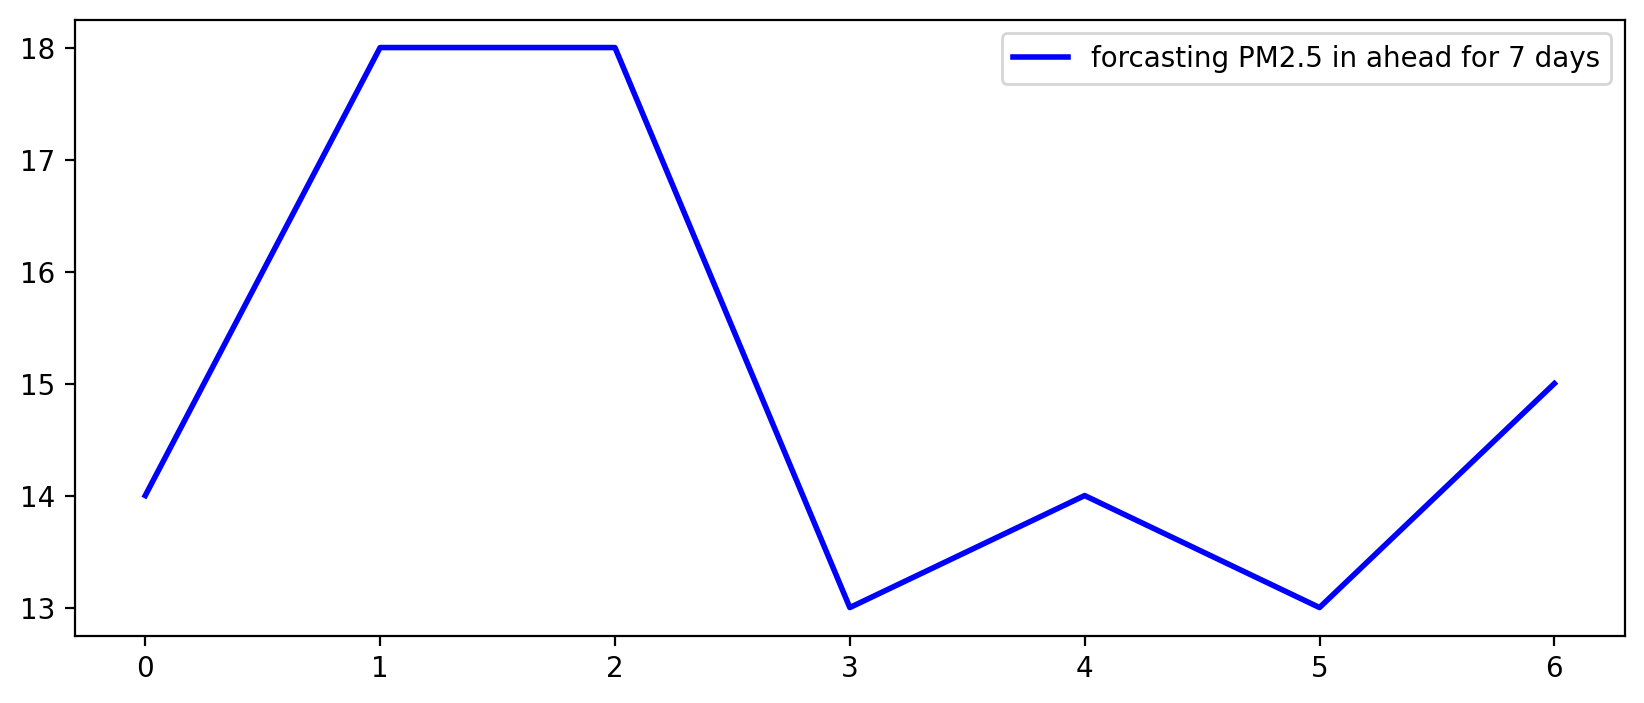

In [33]:
plt.figure(figsize=(10, 4))
plt.plot(ypred, 'b', lw=2.0, label='forcasting PM2.5 in ahead for 7 days')
plt.legend()
plt.show()